In [4]:
import pandas as pd

# Données EPS du S&P 500 (2009–2024, source multpl.com)
data = {
    "year": list(range(2009, 2025)),
    "eps": [
        50.97, 83.77, 96.44, 86.51, 107.30, 113.01, 100.45, 106.26,
        119.27, 150.78, 139.47, 94.13, 208.23, 197.87, 175.53, 192.34
    ]
}

df = pd.DataFrame(data)
df.head()


,year,eps
0,2009,50.97
1,2010,83.77
2,2011,96.44
3,2012,86.51
4,2013,107.30


In [5]:
df["eps_growth_pct"] = df["eps"].pct_change() * 100
df[["year", "eps", "eps_growth_pct"]]


,year,eps,eps_growth_pct
0,2009,50.97,NaN
1,2010,83.77,64.351579
2,2011,96.44,15.124746
3,2012,86.51,-10.296557
4,2013,107.30,24.031904
5,2014,113.01,5.321528
6,2015,100.45,-11.114061
7,2016,106.26,5.783972
8,2017,119.27,12.243554
9,2018,150.78,26.419049


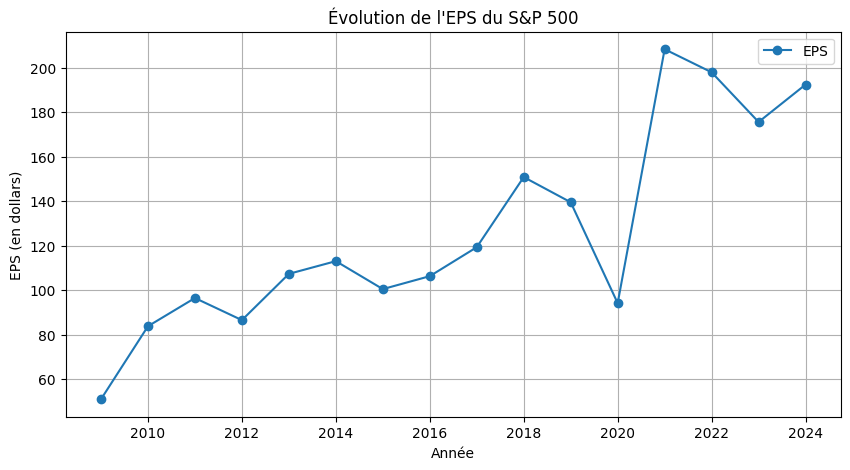

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(df["year"], df["eps"], marker="o", label="EPS")
plt.title("Évolution de l'EPS du S&P 500")
plt.xlabel("Année")
plt.ylabel("EPS (en dollars)")
plt.grid(True)
plt.legend()
plt.show()


In [7]:
from sklearn.linear_model import LinearRegression
import numpy as np

X = df["year"].values.reshape(-1, 1)
y = df["eps"].values.reshape(-1, 1)

model = LinearRegression().fit(X, y)

slope = model.coef_[0][0]
intercept = model.intercept_[0]

print(f"Formule : EPS ≈ {slope:.2f} * année + {intercept:.2f}")


Formule : EPS ≈ 8.42 * année + -16861.88


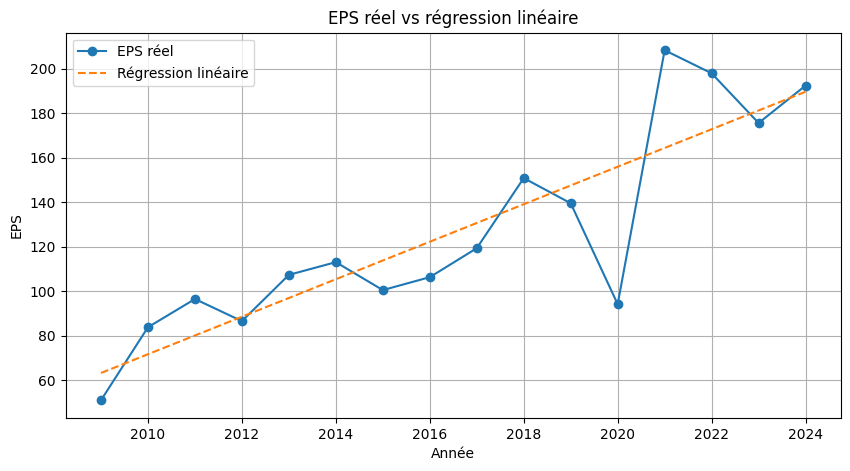

In [8]:
plt.figure(figsize=(10, 5))
plt.plot(df["year"], df["eps"], marker="o", label="EPS réel")

# Prédiction linéaire
y_pred = model.predict(X)
plt.plot(df["year"], y_pred, label="Régression linéaire", linestyle="--")

plt.title("EPS réel vs régression linéaire")
plt.xlabel("Année")
plt.ylabel("EPS")
plt.grid(True)
plt.legend()
plt.show()


In [9]:
start_eps = df["eps"].iloc[0]
end_eps = df["eps"].iloc[-1]
n_years = len(df) - 1

cagr = (end_eps / start_eps) ** (1 / n_years) - 1
print(f"Croissance annualisée (CAGR) : {cagr*100:.2f} %")


Croissance annualisée (CAGR) : 9.26 %


In [10]:
mean_growth = df["eps_growth_pct"].mean()
std_growth = df["eps_growth_pct"].std()

print(f"Moyenne des croissances : {mean_growth:.2f} %")
print(f"Écart-type : {std_growth:.2f} %")


Moyenne des croissances : 13.76 %
Écart-type : 37.13 %


In [11]:
from scipy.stats import trim_mean

trimmed = trim_mean(df["eps_growth_pct"].dropna(), 0.1)
print(f"Moyenne tronquée (10%) : {trimmed:.2f} %")


Moyenne tronquée (10%) : 9.05 %


In [12]:
years_to_exclude = [2020, 2021]
df_filtered = df[~df["year"].isin(years_to_exclude)]

mean_filtered = df_filtered["eps_growth_pct"].mean()
print(f"Moyenne sans 2020-2021 : {mean_filtered:.2f} %")


Moyenne sans 2020-2021 : 9.05 %
